Housing Price Prediction

In [1]:
#imorting libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from dython.nominal import  compute_associations

# Mute warnings
warnings.filterwarnings('ignore')

In [2]:
#importing datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
#train_df.info()

In [4]:
#checking shpae and size of dataset

print(f"Shape of train set: {train_df.shape}")
print(f"Shape of test set: {test_df.shape}")

Shape of train set: (1460, 81)
Shape of test set: (1459, 80)


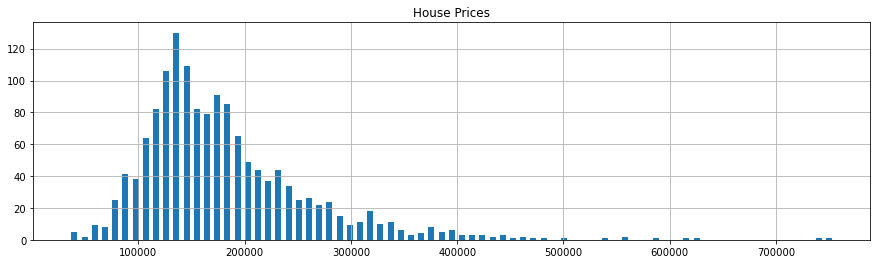

In [5]:
#plotting houses and sale price

train_df.SalePrice.hist(bins=75,rwidth = 0.6,figsize=(15,4),grid=True)
plt.title('House Prices')
plt.show()

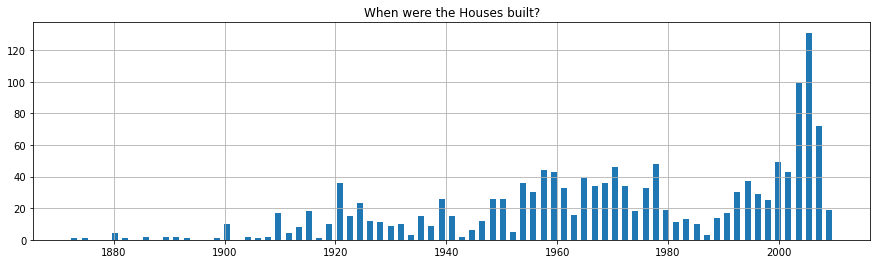

In [6]:
#plotting year built and units 

train_df.YearBuilt.hist(bins=75,rwidth=0.6,figsize=(15,4))
plt.title('When were the Houses built?')
plt.show()

# it is important to normalize data for linear models

categorical_features=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities',
                      'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                      'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
                      'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                      'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
                     'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence',
                     'MiscFeature','SaleType','SaleCondition']
every_column_except_y= [col for col in train_df.columns if col not in ['SalePrice','Id']]
every_column_non_categorical= [col for col in train_df.columns if col not in categorical_features and col not in ['Id'] ]

numeric_feats = train_df[every_column_non_categorical].dtypes[train_df.dtypes != "object"].index
train_df[numeric_feats] = np.log1p(train_df[numeric_feats])

every_column_non_categorical= [col for col in test_df.columns if col not in categorical_features and col not in ['Id'] ]
numeric_feats = test_df[every_column_non_categorical].dtypes[test_df.dtypes != "object"].index
test_df[numeric_feats] = np.log1p(test_df[numeric_feats])

In [7]:
pd.set_option('display.max_rows', 200)

In [8]:
#seprating numerical and categorical columns

numeric_cols = [cname for cname in train_df.columns if train_df[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in train_df.columns if train_df[cname].dtype == 'object' ]

               SalePrice
KitchenAbvGr   -0.135907
EnclosedPorch  -0.128578
MSSubClass     -0.084284
OverallCond    -0.077856
YrSold         -0.028923
LowQualFinSF   -0.025606
Id             -0.021917
MiscVal        -0.021190
BsmtHalfBath   -0.016844
BsmtFinSF2     -0.011378
3SsnPorch       0.044584
MoSold          0.046432
PoolArea        0.092404
ScreenPorch     0.111447
BedroomAbvGr    0.168213
LotFrontage     0.209624
BsmtUnfSF       0.214479
BsmtFullBath    0.227122
GarageYrBlt     0.261366
LotArea         0.263843
HalfBath        0.284108
OpenPorchSF     0.315856
2ndFlrSF        0.319334
WoodDeckSF      0.324413
BsmtFinSF1      0.386420
Fireplaces      0.466929
MasVnrArea      0.472614
YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000


Text(0.5, 1.0, ' Corelations between SalePrice and numerical features.')

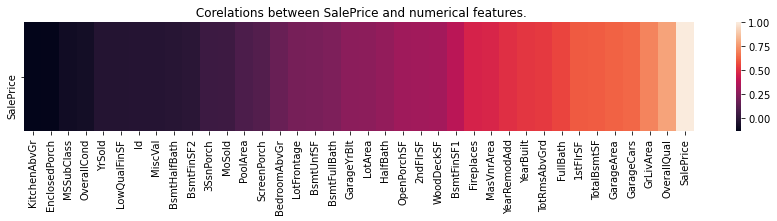

In [9]:
#plotting correrlation b/w numerical attributes and sale price

plt.subplots(figsize=(15,2))
numerical_corr_table = compute_associations(train_df[numeric_cols])
print(numerical_corr_table[['SalePrice']].sort_values(by=['SalePrice']))
sns.heatmap(numerical_corr_table[['SalePrice']].sort_values(by=['SalePrice']).T)
plt.title(f" Corelations between {'SalePrice'} and numerical features.")

#numerical_corr_table

In [10]:
categorical_cols.append('SalePrice')

               SalePrice
Utilities       0.014314
Street          0.041036
LandSlope       0.051784
MiscFeature     0.084141
Condition2      0.099495
Heating         0.120155
Functional      0.128376
Alley           0.142855
LotConfig       0.144981
PoolQC          0.145588
ExterCond       0.153680
LandContour     0.160605
BsmtFinType2    0.174052
RoofMatl        0.177237
Condition1      0.180640
BldgType        0.185833
Fence           0.188719
BsmtCond        0.226706
PavedDrive      0.233537
RoofStyle       0.240201
Electrical      0.244318
CentralAir      0.251328
LotShape        0.276362
GarageCond      0.285213
GarageQual      0.285344
HouseStyle      0.293790
MSZoning        0.327963
SaleCondition   0.368100
SaleType        0.370523
BsmtExposure    0.386653
Exterior1st     0.390862
Exterior2nd     0.392211
MasVnrType      0.434537
HeatingQC       0.442154
BsmtFinType1    0.459141
GarageType      0.499204
Foundation      0.506328
FireplaceQu     0.542181
GarageFinish    0.553059


Text(0.5, 1.0, ' Corelations between SalePrice and categorical features.')

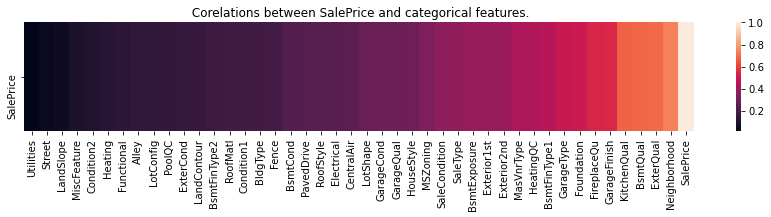

In [11]:
#plotting correrlation b/w categorical attributes and sale price

plt.subplots(figsize=(15,2))
categorical_corr_table = compute_associations(train_df[categorical_cols])
print(categorical_corr_table[['SalePrice']].sort_values(by=['SalePrice']))
sns.heatmap(categorical_corr_table[['SalePrice']].sort_values(by=['SalePrice']).T)
plt.title(f" Corelations between {'SalePrice'} and categorical features.")

In [12]:
#creating seperate table for numerical and categorical columns

num_correlated = numerical_corr_table[['SalePrice']][numerical_corr_table['SalePrice']>0.4].index.tolist()
cat_correlated = categorical_corr_table[['SalePrice']][categorical_corr_table['SalePrice']>0.4].index.tolist()

In [13]:
num_correlated

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [14]:
cat_correlated

['Neighborhood',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SalePrice']

In [15]:
#training dataset with numerical columns coorelated with sale price more than 40%

x_train_num = train_df[num_correlated[:-1]]
y_train = train_df[num_correlated[-1]]
x_train_num

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea
0,7,2003,2003,196.0,856,856,1710,2,8,0,2,548
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,2,460
2,7,2001,2002,162.0,920,920,1786,2,6,1,2,608
3,7,1915,1970,0.0,756,961,1717,1,7,1,3,642
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,3,836
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,953,1647,2,7,1,2,460
1456,6,1978,1988,119.0,1542,2073,2073,2,7,2,2,500
1457,7,1941,2006,0.0,1152,1188,2340,2,9,2,1,252
1458,5,1950,1996,0.0,1078,1078,1078,1,5,0,1,240


In [16]:
#identifying null values

for column in train_df:
    if train_df[column].isnull().any():
       print('{0} has {1} null values'.format(column, train_df[column].isnull().sum()))

LotFrontage has 259 null values
Alley has 1369 null values
MasVnrType has 8 null values
MasVnrArea has 8 null values
BsmtQual has 37 null values
BsmtCond has 37 null values
BsmtExposure has 38 null values
BsmtFinType1 has 37 null values
BsmtFinType2 has 38 null values
Electrical has 1 null values
FireplaceQu has 690 null values
GarageType has 81 null values
GarageYrBlt has 81 null values
GarageFinish has 81 null values
GarageQual has 81 null values
GarageCond has 81 null values
PoolQC has 1453 null values
Fence has 1179 null values
MiscFeature has 1406 null values


In [17]:
#identifying null values

for column in test_df:
    if test_df[column].isnull().any():
       print('{0} has {1} null values'.format(column, test_df[column].isnull().sum()))

MSZoning has 4 null values
LotFrontage has 227 null values
Alley has 1352 null values
Utilities has 2 null values
Exterior1st has 1 null values
Exterior2nd has 1 null values
MasVnrType has 16 null values
MasVnrArea has 15 null values
BsmtQual has 44 null values
BsmtCond has 45 null values
BsmtExposure has 44 null values
BsmtFinType1 has 42 null values
BsmtFinSF1 has 1 null values
BsmtFinType2 has 42 null values
BsmtFinSF2 has 1 null values
BsmtUnfSF has 1 null values
TotalBsmtSF has 1 null values
BsmtFullBath has 2 null values
BsmtHalfBath has 2 null values
KitchenQual has 1 null values
Functional has 2 null values
FireplaceQu has 730 null values
GarageType has 76 null values
GarageYrBlt has 78 null values
GarageFinish has 78 null values
GarageCars has 1 null values
GarageArea has 1 null values
GarageQual has 78 null values
GarageCond has 78 null values
PoolQC has 1456 null values
Fence has 1169 null values
MiscFeature has 1408 null values
SaleType has 1 null values


In [18]:
#Dropping Alley, PoolQC, Fence, MiscFeature as it has low correlation and high missing values

train_df.drop('Alley',
  axis='columns', inplace=True)

train_df.drop('PoolQC',
  axis='columns', inplace=True)

train_df.drop('Fence',
  axis='columns', inplace=True)

train_df.drop('MiscFeature',
  axis='columns', inplace=True)

In [19]:
#Dropping Alley, PoolQC, Fence, MiscFeature as it has low correlation and high missing values

test_df.drop('Alley',
  axis='columns', inplace=True)

test_df.drop('PoolQC',
  axis='columns', inplace=True)

test_df.drop('Fence',
  axis='columns', inplace=True)

test_df.drop('MiscFeature',
  axis='columns', inplace=True)

In [20]:
#value counts to replace null values

test_df['MSZoning'].value_counts()
test_df['Utilities'].value_counts()
test_df['Exterior1st'].value_counts()
test_df['Exterior2nd'].value_counts()
test_df['BsmtFullBath'].value_counts()
test_df['BsmtHalfBath'].value_counts()
test_df['KitchenQual'].value_counts()
test_df['Functional'].value_counts()
test_df['GarageCars'].value_counts()
test_df['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [21]:
#Replacing Null values with appropriate alternative

train_df['LotFrontage'].fillna((train_df['LotFrontage'].median()), inplace=True)
train_df['MasVnrType'].fillna("None", inplace=True)
train_df['MasVnrArea'].fillna((train_df['MasVnrArea'].median()), inplace=True)

train_df['BsmtQual'].fillna("NB", inplace=True)
train_df['BsmtCond'].fillna("NB", inplace=True)
train_df['BsmtExposure'].fillna("NB", inplace=True)
train_df['BsmtFinType1'].fillna("NB", inplace=True)
train_df['BsmtFinType2'].fillna("NB", inplace=True)

train_df['FireplaceQu'].fillna("NF", inplace=True)

train_df['GarageType'].fillna("NG", inplace=True)
train_df['GarageYrBlt'].fillna((train_df['MasVnrArea'].mean()), inplace=True) #to not make a big chamge in variance
train_df['GarageFinish'].fillna("NG", inplace=True)
train_df['GarageQual'].fillna("NG", inplace=True)
train_df['GarageCond'].fillna("NG", inplace=True)

In [22]:
#Replacing Null values with appropriate alternative

test_df['LotFrontage'].fillna((test_df['LotFrontage'].median()), inplace=True)
test_df['MasVnrType'].fillna("None", inplace=True)
test_df['MasVnrArea'].fillna((test_df['MasVnrArea'].median()), inplace=True)
test_df['MSZoning'].fillna("RL", inplace=True)
test_df['Utilities'].fillna("AllPub", inplace=True)

test_df['BsmtQual'].fillna("NB", inplace=True)
test_df['BsmtCond'].fillna("NB", inplace=True)
test_df['BsmtExposure'].fillna("NB", inplace=True)
test_df['BsmtFinType1'].fillna("NB", inplace=True)
test_df['BsmtFinType2'].fillna("NB", inplace=True)
test_df['GarageYrBlt'].fillna((test_df['MasVnrArea'].mean()), inplace=True)

test_df['BsmtFinSF1'].fillna((test_df['BsmtFinSF1'].mean()), inplace=True)
test_df['BsmtFinSF2'].fillna((test_df['BsmtFinSF2'].mean()), inplace=True)
test_df['BsmtUnfSF'].fillna((test_df['BsmtUnfSF'].mean()), inplace=True)
test_df['TotalBsmtSF'].fillna((test_df['TotalBsmtSF'].mean()), inplace=True)

test_df['BsmtFullBath'].fillna(0, inplace=True)
test_df['BsmtHalfBath'].fillna(0, inplace=True)

test_df['KitchenQual'].fillna("TA", inplace=True)

test_df['Functional'].fillna("Typ", inplace=True)

test_df['GarageCars'].fillna(2, inplace=True)
test_df['GarageArea'].fillna((test_df['GarageArea'].mean()), inplace=True)

test_df['SaleType'].fillna("WD", inplace=True)

test_df['Exterior1st'].fillna("VinylSd", inplace=True)
test_df['Exterior2nd'].fillna("VinylSd", inplace=True)

test_df['FireplaceQu'].fillna("NF", inplace=True)

test_df['GarageType'].fillna("NG", inplace=True)
test_df['GarageYrBlt'].fillna((test_df['GarageYrBlt'].mean()), inplace=True) #to not make a big chamge in variance
test_df['GarageFinish'].fillna("NG", inplace=True)
test_df['GarageQual'].fillna("NG", inplace=True)
test_df['GarageCond'].fillna("NG", inplace=True)

In [23]:
#recheck null values

for column in train_df:
    if train_df[column].isnull().any():
       print('{0} has {1} null values'.format(column, train_df[column].isnull().sum()))

Electrical has 1 null values


In [24]:
#recheck null values

for column in test_df:
    if test_df[column].isnull().any():
       print('{0} has {1} null values'.format(column, test_df[column].isnull().sum()))

In [25]:
#creating copy of train and test with only features that have higher than 0.4 correlation

traincopy = train_df.copy()
testcopy = test_df.copy()

In [26]:
#only leaving values that have higher than 0.4 correlation, dropping everything else

traincopy.drop(['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
"MSZoning",
"Street", 
"LotShape",
"LandContour", 
"Utilities",
"LotConfig",
"LandSlope",
"Condition1",
"Condition2",
"BldgType",
"HouseStyle",
"RoofStyle",
"RoofMatl",
"Exterior1st",
"Exterior2nd",
"ExterCond",
"BsmtCond",
"BsmtExposure",
"BsmtFinType2",
"Heating",
"CentralAir",
"Electrical",
"Functional",
"GarageQual",
"GarageCond",
"PavedDrive",
"SaleType",
"SaleCondition"], axis=1, inplace = True)

testcopy.drop(['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
"MSZoning",
"Street", 
"LotShape",
"LandContour", 
"Utilities",
"LotConfig",
"LandSlope",
"Condition1",
"Condition2",
"BldgType",
"HouseStyle",
"RoofStyle",
"RoofMatl",
"Exterior1st",
"Exterior2nd",
"ExterCond",
"BsmtCond",
"BsmtExposure",
"BsmtFinType2",
"Heating",
"CentralAir",
"Electrical",
"Functional",
"GarageQual",
"GarageCond",
"PavedDrive",
"SaleType",
"SaleCondition"], axis=1, inplace = True)

In [27]:
traincopy.shape

(1460, 25)

In [28]:
traincopy.head()

,Id,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,...,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,SalePrice
0,1,CollgCr,7,2003,2003,BrkFace,196.0,Gd,PConc,Gd,...,2,Gd,8,0,NF,Attchd,RFn,2,548,208500
1,2,Veenker,6,1976,1976,None,0.0,TA,CBlock,Gd,...,2,TA,6,1,TA,Attchd,RFn,2,460,181500
2,3,CollgCr,7,2001,2002,BrkFace,162.0,Gd,PConc,Gd,...,2,Gd,6,1,TA,Attchd,RFn,2,608,223500
3,4,Crawfor,7,1915,1970,None,0.0,TA,BrkTil,TA,...,1,Gd,7,1,Gd,Detchd,Unf,3,642,140000
4,5,NoRidge,8,2000,2000,BrkFace,350.0,Gd,PConc,Gd,...,2,Gd,9,1,TA,Attchd,RFn,3,836,250000


In [29]:
df1 = traincopy.copy()
df1['source'] = 'train'
df2 = testcopy.copy()
df2['source'] = 'test'

data = pd.concat([df1, df2])

In [30]:
data["SalePrice"].value_counts()

140000.0    20
135000.0    17
155000.0    14
145000.0    14
190000.0    13
            ..
316600.0     1
223000.0     1
145900.0     1
254000.0     1
198900.0     1
Name: SalePrice, Length: 663, dtype: int64

In [31]:
testcopy.select_dtypes(include=['object']).columns.tolist()

['Neighborhood',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [32]:
g = data.columns.to_series().groupby(data.dtypes).groups
data_dum = pd.get_dummies(data, columns=['Neighborhood',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish'])

In [33]:
train = data_dum[data_dum["source"] == "train"]
test = data_dum[data_dum["source"] == "test"]

In [34]:
train.head()

,Id,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NG,GarageFinish_Fin,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf
0,1,7,2003,2003,196.0,856.0,856,1710,2,8,...,1,0,0,0,0,0,0,0,1,0
1,2,6,1976,1976,0.0,1262.0,1262,1262,2,6,...,1,0,0,0,0,0,0,0,1,0
2,3,7,2001,2002,162.0,920.0,920,1786,2,6,...,1,0,0,0,0,0,0,0,1,0
3,4,7,1915,1970,0.0,756.0,961,1717,1,7,...,0,0,0,0,1,0,0,0,0,1
4,5,8,2000,2000,350.0,1145.0,1145,2198,2,9,...,1,0,0,0,0,0,0,0,1,0


In [35]:
test.head()

,Id,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NG,GarageFinish_Fin,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf
0,1461,5,1961,1961,0.0,882.0,896,896,1,5,...,1,0,0,0,0,0,0,0,0,1
1,1462,6,1958,1958,108.0,1329.0,1329,1329,1,6,...,1,0,0,0,0,0,0,0,0,1
2,1463,5,1997,1998,0.0,928.0,928,1629,2,6,...,1,0,0,0,0,0,1,0,0,0
3,1464,6,1998,1998,20.0,926.0,926,1604,2,7,...,1,0,0,0,0,0,1,0,0,0
4,1465,8,1992,1992,0.0,1280.0,1280,1280,2,5,...,1,0,0,0,0,0,0,0,1,0


In [36]:
train.drop(columns=["source"], axis=1, inplace=True)
test.drop(columns=["source"], axis=1, inplace=True)

In [37]:
test.drop(columns=["SalePrice"], axis=1, inplace=True)

In [38]:
print(f"Shape of train set: {train.shape}")
print(f"Shape of test set: {test.shape}")

Shape of train set: (1460, 91)
Shape of test set: (1459, 90)


In [39]:
df_quant = train_df[numeric_cols]
#df_quant.hist(bins=50, figsize = (20,15))
#plt.show()

Getting started with linear regression. 

In [40]:
labels = train["SalePrice"]
features = train.drop(["SalePrice"], axis=1)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [42]:
#splitting into train and test. 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=1)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test =ss.fit_transform(X_test)

In [44]:
model = LinearRegression().fit(X_train, y_train)

In [45]:
y_predict = model.predict(X_test)

In [46]:
def RMSE(y_target, y_pred):
    return np.sqrt(np.square(np.subtract(y_target,y_pred)).mean())
def MSE(y_target, y_pred):
    return (np.square(np.subtract(y_target,y_pred)).mean())

In [47]:
print(RMSE(y_test, y_predict))

1.490915507971207e+16


In [48]:
#Trying lasso and ridge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model

In [49]:
labels = train.SalePrice
features = train.drop(["SalePrice"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=1)
X_train.shape

(1022, 90)

In [50]:
ridge = linear_model.Ridge().fit(X_train, y_train)
lasso = linear_model.Lasso().fit(X_train, y_train)

In [51]:
#RMSE for ridge and lasso
print(RMSE(y_test,ridge.predict(X_test))) #RMSE for ridge regression
print(RMSE(y_test,lasso.predict(X_test))) #RMSE for lasso regression

31286.22867980232
31415.572449590127


In [52]:
#No improvement in results. Finally trying  cross-validation on training dataset to find better regularization parameter alpha for Ridge and Lasso regression models.

In [53]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [54]:
def get_best_alpha(model,X,y,alphas):
    kf = KFold(n_splits=3, shuffle=False) #kernel crashed, removed random state
    results = []
    for alpha in alphas:
        model.set_params(alpha=alpha)
        for train_indexes, test_indexes in kf.split(X):
            X_test, X_val = X.values[train_indexes], X.values[test_indexes]
            y_test, y_val = y.values[train_indexes], y.values[test_indexes]

            model.fit(X_test, y_test)
            mse = mean_squared_error(y_val,model.predict(X_val))
            results.append((alpha, mse))
   

    best_alpha, mse = sorted(results, key=lambda x: x[1])[0]
    return best_alpha, mse

In [55]:
ridge_alphas = np.linspace(0.1, 10, 100)
lasso_alphas = np.linspace(0.001, 5, 100)

print("Ridge best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Ridge(), X_train, y_train, ridge_alphas))
print("Lasso best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Lasso(), X_train, y_train, lasso_alphas))

Ridge best alpha 6.3000 - Avg MSE 910016938.3789 
Lasso best alpha 5.0000 - Avg MSE 953400167.5578 


In [56]:
ridge = linear_model.Ridge(alpha=6.3).fit(X_train, y_train)
lasso = linear_model.Lasso(alpha=5).fit(X_train, y_train)

print(RMSE(y_test,ridge.predict(X_test)))
print(RMSE(y_test,lasso.predict(X_test))) 

30991.373119838267
31383.32077936961


In [57]:
#Small improvement, but still no where close to a result that will be in the top 50%
#We will try other models

In [58]:
#Trying random forest regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
labels = train.SalePrice
features = train.drop(["SalePrice"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=1)
X_train.shape

(1022, 90)

In [61]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
y_predict_random_forest = rf.predict(X_test)
print(RMSE(y_test,rf.predict(X_test)))

27667.14200610729


In [63]:
#Similar results as with linear, lasso and ridge regression
#Starting with hyperparameter tuning for Random Forest (source https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb

In [64]:
#parameters currently in use
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [65]:
# Random Search with Cross Validation
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [66]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model

#rf_random.fit(features, labels); (commented, because it takes 15-20 minutes to run)

In [70]:
rf_random.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [71]:
#GridSearch around the best values returned by random search.

In [72]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [None],
    'max_features': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [73]:
#grid_search.fit(features, labels); (commented, because it takes 5 minutes to run)

In [74]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [75]:
#applying best parameters to RandomForestRegressor

rfrhyper = RandomForestRegressor(max_depth=None, max_features=6, min_samples_leaf=1, min_samples_split=2, bootstrap=False, n_estimators =100)
rfrhyper.fit(X_train, y_train)
print(RMSE(y_test,rfrhyper.predict(X_test)))

28967.00508375427


Getting started with xgboost model

In [76]:
!pip install py-xgboost

ERROR: Could not find a version that satisfies the requirement py-xgboost
ERROR: No matching distribution found for py-xgboost


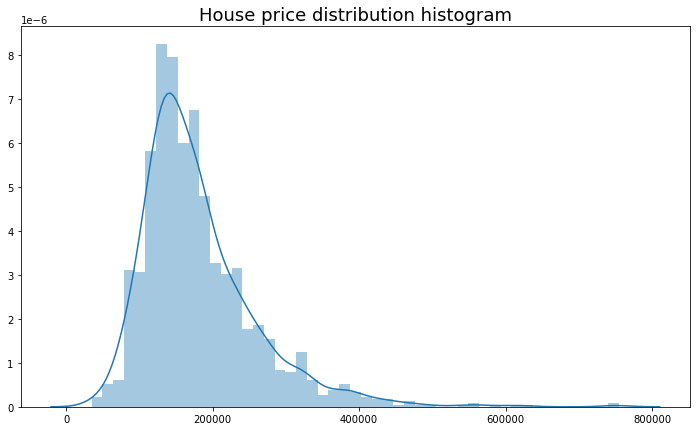

In [77]:
# we have a positive skew, must fix

plt.figure(figsize=(12, 7))

sns.distplot(train['SalePrice']).set(ylabel=None, xlabel=None)
plt.title('House price distribution histogram', fontsize=18)
plt.show()

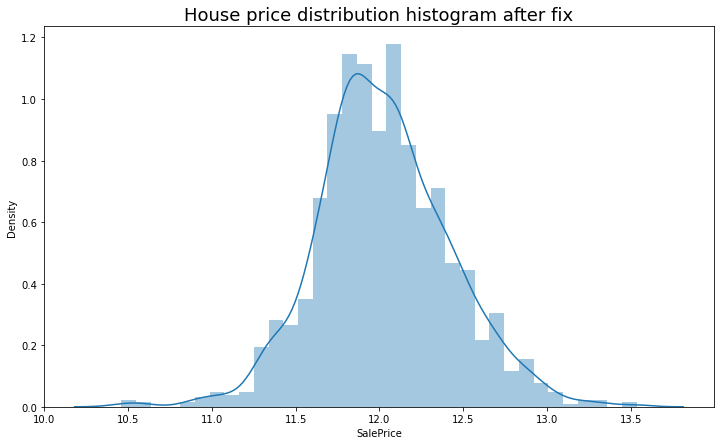

In [78]:
train['SalePrice'] = np.log1p(train['SalePrice'])
plt.figure(figsize=(12, 7))

sns.distplot(train['SalePrice'])
plt.title('House price distribution histogram after fix', fontsize=18)
plt.show()

In [79]:
from xgboost.sklearn import XGBRegressor

labels = train["SalePrice"]
features = train.drop(["SalePrice"], axis=1)

xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

xgboost.fit(features,labels)

from sklearn.model_selection import cross_val_score, KFold

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def cv_rmse(model, features=features):
    rmse = np.sqrt(-cross_val_score(model, features, labels, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

from datetime import datetime

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

[13:12:44] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:12:48] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:12:52] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:12:58] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:13:03] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:13:08] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:13:13] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objecti

In [ ]:
# Testing on actual test data for Kaggle

# pred = xgboost.predict(test)
# xgboostdata = pd.DataFrame(data = {"Id":test["Id"], "SalePrice": pred})
# xgboostdata.to_csv(r'/Users/koldekiv/Desktop/xgboost.csv', index = False)